In [1]:
# binary classifier using pytorch
import warnings
warnings.filterwarnings('ignore')

In [12]:
import sklearn.datasets
X, y = sklearn.datasets.make_moons(200, noise=0.2)

In [13]:
X[0:5]

array([[ 1.21467912,  0.36670431],
       [ 1.19342504, -0.08309968],
       [ 1.63744839, -0.73891268],
       [-0.02131425,  1.01863914],
       [ 1.20641908, -0.35727806]])

In [14]:
y[0:5]

array([0, 0, 1, 0, 1])

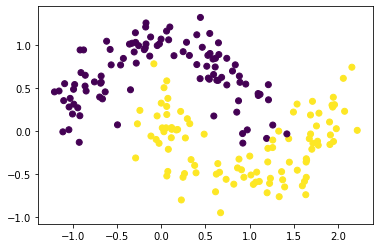

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

In [16]:
import torch

In [17]:
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor) 

In [ ]:
# build network
import torch.nn as nn
import torch.nn.functional as F

In [18]:
class MyClassifier(nn.Module):
    def __init__(self):
        super(MyClassifier, self).__init__() 
        self.fc1 = nn.Linear(2,3) 
        self.fc2 = nn.Linear(3,2) 
        
    def forward(self, x):
        x = self.fc1(x) 
        x = F.tanh(x) 
        x = self.fc2(x)
        return x
    
    def predict(self, x):
        pred = F.softmax(self.forward(x)) 
        ans = [] 
        for t in pred:
            if t[0] > t[1]:
                ans.append(0) 
            else:
                ans.append(1) 
        return torch.tensor(ans)         

In [19]:
# initilize model 

In [20]:
model = MyClassifier()
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [21]:
# number of epochs
epochs = 10000
losses = []

for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y) 
    losses.append(loss.item()) 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step()

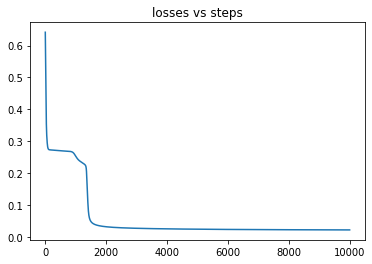

In [22]:
plt.plot(range(epochs), losses)
plt.title('losses vs steps')
plt.show()

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(model.predict(X), y)

0.995

In [24]:
losses[9990:-1]

[0.021738117560744286,
 0.02173783630132675,
 0.021737582981586456,
 0.021737368777394295,
 0.02173718437552452,
 0.021736990660429,
 0.021736733615398407,
 0.02173646166920662,
 0.02173619717359543]

In [25]:
model.predict(X)

tensor([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 0, 1, 0])

In [26]:
y

tensor([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
# https://medium.com/@prudhvirajnitjsr/simple-classifier-using-pytorch-37fba175c25c